In [1]:
import keras
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
data = pd.read_csv('C://Users//varun//Documents//DSP//aptos2019-blindness-detection//train.csv')

In [3]:
data.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [4]:
data = data[data['diagnosis'].isin([0,4])]

In [5]:
data.head()

,id_code,diagnosis
1,001639a390f0,4
3,002c21358ce6,0
4,005b95c28852,0
5,0083ee8054ee,4
6,0097f532ac9f,0


In [9]:
data.shape

(2100, 2)

In [7]:
y=np.array(data.diagnosis)
y

array([4, 0, 0, ..., 4, 0, 0], dtype=int64)

In [8]:
import glob
filelist = glob.glob('C:\\Users\\varun\\Documents\\DSP\\aptos2019-blindness-detection\\train_img\\*')

In [10]:
filelist[0]

'C:\\Users\\varun\\Documents\\DSP\\aptos2019-blindness-detection\\train_img\\000c1434d8d7.png'

In [11]:
for file in filelist:
    print(file)

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\000c1434d8d7.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\001639a390f0.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0024cdab0c1e.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\002c21358ce6.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\005b95c28852.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0083ee8054ee.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0097f532ac9f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\00a8624548a9.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\00b74780d31d.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\00cb6555d108.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\00cc2b75cddd.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0dce95217626.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0e0003ddd8df.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0e0fc1d9810c.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0e3572b5884a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0e43c8298fc0.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0e75d51152fc.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0e82bcacc475.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0e94cd271c00.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0eb52045349f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0eced86c9db8.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\0edadb2aa127.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\1c0e5dd1b14c.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\1c13a1483f4a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\1c3a6b4449e9.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\1c47815f4a6b.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\1c4d87baaffc.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\1c4f3aa4df06.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\1c578b72d7b3.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\1c5ad36fb799.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\1c5e6cdc7ee1.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\1c6d119c3d70.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\1c7a013eeba7.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\286e9981dd9b.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\28751f290ba3.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\28824d12d31d.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\289a47dcbb82.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\28a4d00927b7.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\28dc010a0780.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\28f73575e1f2.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\28f93cad89c5.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\28f98cfe3858.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\290ecdba359f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\29192375ab1b.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\36865bbc64d6.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\369229040a34.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\3694e8c8e09a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\36a1e3c780a0.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\36b5b3c9fb32.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\36e4b704b905.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\36ec36c301c1.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\370f575adb23.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\3710ff45299c.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\3730c322d35b.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\3732de8b416f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\44271f3cb18f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\445a8a6da55c.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\4462fba1d2a1.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\4464bb62bf20.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\4478b870e549.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\44855f666225.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\44878f34e31f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\4489d421e5aa.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\44976c3b11a6.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\44a4d04162cc.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\44a86263117b.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\504a69096fcb.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5056fa7d505f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5069feccd866.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5077cdb88aed.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5078caaf1f57.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\50840c36f0b4.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5090917a2676.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\50915e2329a1.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\50916d67bb51.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\50a2aef380c8.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\50d8249f7bc9.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5c8482926a08.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5c85d22bd0de.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5ca73d28f17f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5ca779ace6e7.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5cab3ef4b31c.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5cbe88914a72.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5cc6dea19614.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5cde55f745af.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5ce5eeaf757a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5cf9127f251a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\5d024177e214.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\6b664ed2a938.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\6b66b0e86f7e.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\6b7cf869622a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\6b869f37cdf3.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\6b91e99c9408.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\6ba5ed791444.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\6baafa56895c.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\6bb30ec3231a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\6bcce181be65.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\6bf26b777e3a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\6bf2a81a5d91.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\789c60cba801.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\789f0ec1eab8.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\78a577c3e0bf.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\78b3f819dcc5.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\78bcdffb8785.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\78d53c82a23e.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\79059d0592c4.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\79540be95177.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\799214e8b07c.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\799cb4c816ae.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\79ade634c633.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\8650d32f4a9e.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\8660e1864665.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\86722fcd802c.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\8676427e4625.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\8688f3d0fcaf.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\8693ab1fd2be.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\869bbd3170cc.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\86b3a7929bec.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\86baef833ae0.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\86d58f850a0c.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\86d6808f0609.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\92b0d27fc0ec.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\92d8a7c8e718.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\92d9e9f08709.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\92e3d608fd3c.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\92f313287a29.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\92fcf50b3562.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\930fee99213a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\932181b93b2f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\934104859e68.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\93421787f520.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\936299166bea.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\a06e41bd2634.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\a06e5ac695ce.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\a07d571bf7ba.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\a07d9a5045cb.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\a07efb1ecfc0.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\a08a0133754a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\a0a0cd8af5a6.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\a0adbe677508.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\a0b7ad98df57.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\a0cd7bffdaa0.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\a0d04a19cf40.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ab724603ee93.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ab78a66dee6a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ab7991df166b.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ab88081e5654.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\aba3063c5413.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ababe19ed448.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\abbb8791785e.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\abdb365cacbc.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\abe940882578.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\abf09c44d5f4.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\abf0f56c6f12.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\b86fb2d5be1a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\b87f9c59748b.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\b89938407ee6.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\b8ac328009e0.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\b8dab47a260e.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\b8e20c076b03.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\b8e9a8f4617d.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\b8ebedd382de.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\b8f1b30877db.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\b8fb9f55cd6d.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\b90bc89ce8d8.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\c5ad60521f8c.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\c5b58cc992af.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\c5ba9e455d5e.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\c5bec7f1e5f3.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\c5e238aa18be.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\c613db1cab27.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\c6229222bf22.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\c62585bd68fb.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\c62cef02efa2.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\c639d837f5e4.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\c64c0966b4cf.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\d2dc86021c67.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\d2fb715b0c41.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\d2ffe9287dc7.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\d30d079e6f9a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\d332d7b8a26e.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\d364423ec6f9.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\d38cf0f4a9af.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\d39752cb6e57.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\d3be5346684b.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\d3d578fe433f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\d3de0d313d61.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\e10190a9d52f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\e12b67835e03.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\e12d41e7b221.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\e12df54e0d1e.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\e12f9f19d1be.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\e13412678eff.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\e135d7ba9a0e.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\e1418d28d668.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\e150935f66a6.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\e160a3b19911.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\e16af45285e5.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\eda1d75cbcf0.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\eda29a9d78f3.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\edceb0657d77.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ee02294cc3d9.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ee059945b08a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ee1ec90b980f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ee2c2a5f7d0e.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ee36ca728641.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ee3f5cf52188.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ee3fe7809e6a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\ee6e39319b39.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\fc603cbedb41.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\fc782722a50c.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\fc898dfeb24f.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\fc8fce67fbf8.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\fca1a8738b8a.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\fca931da5c5e.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\fcc32dffd24d.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\fcc55ae641ae.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\fcc6aa6755e6.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\fce73678f650.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detection\train_img\fce93caa4758.png
C:\Users\varun\Documents\DSP\aptos2019-blindness-detec

In [10]:
#filelist=filelist[0:5]

In [12]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
imageT_list = []
for filename in filelist:
    im = imread(filename)
    image_resized = resize(im, (64,64,3))
    grey_image =rgb2gray(image_resized)
    imageT_list.append(grey_image)

In [13]:
imageT_list

[]

In [14]:
# load the image
import glob
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
imageT_list = []
filelist = glob.glob('C:\\Users\\varun\\Documents\\DSP\\aptos2019-blindness-detection\\train_img\*')
label_arr=[]
for file in filelist:
    print("outer")
    for filename in (file+'\\*.png'):
        print("inner")
        im = imread(filename)
        image_resized = resize(im, (64,64,3))
        grey_image =rgb2gray(image_resized)
        imageT_list.append(grey_image)

In [25]:
imageT_list[0]

array([[0.00392157, 0.00784314, 0.00392157, ..., 0.00194941, 0.00784314,
        0.00392157],
       [0.00194941, 0.00194941, 0.00194941, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00194941, 0.00194941, 0.00784314, ..., 0.00194941, 0.00392157,
        0.00392157],
       ...,
       [0.00392157, 0.00416667, 0.00392157, ..., 0.00194941, 0.00392157,
        0.00392157],
       [0.00784314, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00784314,
        0.00392157]])

In [15]:
X = np.stack(imageT_list)

ValueError: need at least one array to stack

In [16]:
y = data.iloc[:, -1].values

(2100,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [2958, 2100]

In [14]:
x_train=x_train[:2100]

In [64]:
y=y[0:5]
y

array([4, 0, 0, 4, 0], dtype=int64)

In [65]:
y=np.array([1,0,0,1,0])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size=0.20, random_state=42)

In [17]:
X_train = X_train.reshape(1680,64,64,1)
X_test = X_test.reshape(420,64,64,1)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(64,64,1)))
model.add(Conv2D(32,kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 1680 samples, validate on 420 samples
Epoch 1/3
1680/1680 [==============================] - ETA: 2:24 - loss: 3.8333 - accuracy: 0.0000e+ - ETA: 1:34 - loss: 8.6249 - accuracy: 0.0000e+ - ETA: 1:13 - loss: 8.9444 - accuracy: 0.0000e+ - ETA: 1:03 - loss: 7.1875 - accuracy: 0.0000e+ - ETA: 56s - loss: 7.6666 - accuracy: 0.0000e+00 - ETA: 50s - loss: 7.3472 - accuracy: 0.0000e+0 - ETA: 47s - loss: 7.1190 - accuracy: 0.0000e+0 - ETA: 43s - loss: 6.7083 - accuracy: 0.0000e+0 - ETA: 41s - loss: 7.0277 - accuracy: 0.0000e+0 - ETA: 39s - loss: 7.0916 - accuracy: 0.0000e+0 - ETA: 38s - loss: 6.7954 - accuracy: 0.0000e+0 - ETA: 36s - loss: 6.2291 - accuracy: 0.0000e+0 - ETA: 35s - loss: 6.6346 - accuracy: 0.0000e+0 - ETA: 34s - loss: 6.9821 - accuracy: 0.0000e+0 - ETA: 32s - loss: 7.0277 - accuracy: 0.0000e+0 - ETA: 31s - loss: 6.8281 - accuracy: 0.0000e+0 - ETA: 30s - loss: 6.8774 - accuracy: 0.0000e+0 - ETA: 29s - loss: 6.9213 - accuracy: 0.0000e+0 - ETA: 28s - loss: 7.0614 - accurac

In [21]:
model.predict(X_test[:4])

array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [22]:
y_test[:4]

array([0, 0, 0, 0], dtype=int64)

In [16]:
x_train.shape

(5, 64, 64)

In [20]:
nsamples, nx, ny = x_train.shape
X = x_train.reshape((nsamples,nx*ny))

In [21]:
X[0]

array([0.00392157, 0.00784314, 0.00392157, ..., 0.00392157, 0.00784314,
       0.00392157])

In [22]:
X.shape

(5, 4096)

In [23]:
y = train['diagnosis'].values
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

NameError: name 'train' is not defined

In [27]:
y = le.fit_transform(y)

In [30]:
y.shape

(48,)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [32]:
X_train.shape

(38, 12288)

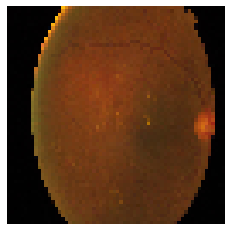

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
sm = X[0]
sm_image = sm.reshape(64,64,3)
plt.imshow(sm_image, cmap = mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [34]:
y[8]

2

In [35]:
from sklearn.metrics import confusion_matrix 

In [36]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
y_pred_DT = dtree_model.predict(X_test) 

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred_DT))
print('F1 score:', f1_score(y_test, y_pred_DT, average = 'macro'))
print('Recall:', recall_score(y_test, y_pred_DT, average = 'macro'))
print('Precision:', precision_score(y_test, y_pred_DT, average = 'macro'))
print('\n Clasification report:\n', classification_report(y_test, y_pred_DT))
print('\n Confusion matrix:\n',confusion_matrix(y_test, y_pred_DT))

Accuracy: 0.5
F1 score: 0.2
Recall: 0.2
Precision: 0.2

 Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         2

    accuracy                           0.50        10
   macro avg       0.20      0.20      0.20        10
weighted avg       0.50      0.50      0.50        10


 Confusion matrix:
 [[5 0 0 0 0]
 [0 0 2 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 2 0 0]]


In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree_model, X_train, y_train, cv=3, scoring="accuracy")

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([0.73333333, 0.75      , 0.63636364])

In [41]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
y_pred_NB = gnb.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, f1_score

#confusion_matrix(y_train.argmax(axis=1), y_train_pred.argmax(axis=1))
print('Accuracy:', accuracy_score(y_test, y_pred_NB))
print('F1 score:', f1_score(y_test, y_pred_NB, average = 'macro'))
print('Recall:', recall_score(y_test, y_pred_NB, average = 'macro'))
print('Precision:', precision_score(y_test, y_pred_NB, average = 'macro'))
print('\n clasification report:\n', classification_report(y_test, y_pred_NB))
print('\n confusion matrix:\n',confusion_matrix(y_test, y_pred_NB))

Accuracy: 0.5
F1 score: 0.25
Recall: 0.25
Precision: 0.25

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         2

    accuracy                           0.50        10
   macro avg       0.25      0.25      0.25        10
weighted avg       0.50      0.50      0.50        10


 confusion matrix:
 [[5 0 0 0]
 [0 0 3 0]
 [0 0 0 0]
 [0 0 2 0]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packag

In [43]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
y_pred_svm = svm_model_linear.predict(X_test) 

In [44]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, f1_score

#confusion_matrix(y_train.argmax(axis=1), y_train_pred.argmax(axis=1))
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('F1 score:', f1_score(y_test, y_pred_svm, average = 'macro'))
print('Recall:', recall_score(y_test, y_pred_svm, average = 'macro'))
print('Precision:', precision_score(y_test, y_pred_svm, average = 'macro'))
print('\n clasification report:\n', classification_report(y_test, y_pred_svm))
print('\n confusion matrix:\n',confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.6
F1 score: 0.35
Recall: 0.3333333333333333
Precision: 0.375

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         2

    accuracy                           0.60        10
   macro avg       0.38      0.33      0.35        10
weighted avg       0.65      0.60      0.62        10


 confusion matrix:
 [[5 0 0 0]
 [0 1 2 0]
 [0 0 0 0]
 [0 1 1 0]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packag